In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns

In [20]:
DATA_FOLDER = 'data'
FIG_FOLDER = 'fig'

os.makedirs(FIG_FOLDER, exist_ok=True)

data_file = os.path.join(DATA_FOLDER, 'traveltime.csv')
df = pd.read_csv(data_file, sep=";", index_col=[0])

print(df.head())

                                Time used hours,minutes Men 1979  \
Activity                                                           
02     Travel to and from work                              0.18   

                                Time used hours,minutes Men 1987  \
Activity                                                           
02     Travel to and from work                               0.2   

                                Time used hours,minutes Men 1999  \
Activity                                                           
02     Travel to and from work                              0.19   

                                Time used hours,minutes Men 2009  \
Activity                                                           
02     Travel to and from work                              0.15   

                                Time used hours,minutes Women 1979  \
Activity                                                             
02     Travel to and from work          

In [21]:
df = df.melt()
print(df.head())

                             variable  value
0    Time used hours,minutes Men 1979   0.18
1    Time used hours,minutes Men 1987   0.20
2    Time used hours,minutes Men 1999   0.19
3    Time used hours,minutes Men 2009   0.15
4  Time used hours,minutes Women 1979   0.14


In [34]:
row_list = []
for i, row in df.iterrows():
    
    # Extract gender and year from label
    _, _, _, gender, year = row["variable"].split(" ")
    
    # Convert ugly string into a number of minutes
    str_value = str(row["value"])
    h, m = str_value.split(".")
    time = int(h) * 60 + int(m)
    
    # Add new row to the list (as a dictionary)
    row_list.append(
        {"year": year, "gender": gender, "time (in minutes)": time}
    )

# Create new dataframe

clean_df = pd.DataFrame(row_list)
clean_df.to_csv(os.path.join(DATA_FOLDER, "clean_traveltime.csv"), index=False)
print(clean_df)   

   year gender  time (in minutes)
0  1979    Men                 18
1  1987    Men                  2
2  1999    Men                 19
3  2009    Men                 15
4  1979  Women                 14
5  1987  Women                 15
6  1999  Women                 16
7  2009  Women                 15


In [37]:
df = pd.read_csv(os.path.join(DATA_FOLDER, "clean_traveltime.csv"))
print(df)

   year gender  time (in minutes)
0  1979    Men                 18
1  1987    Men                  2
2  1999    Men                 19
3  2009    Men                 15
4  1979  Women                 14
5  1987  Women                 15
6  1999  Women                 16
7  2009  Women                 15


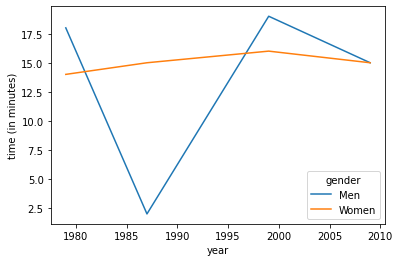

In [38]:
sns.lineplot(data=df, x="year", y="time (in minutes)", hue="gender")
plt.show()